# Continuous Control

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
#!pip -q install ./python

import gym
import random
import torch
import numpy as np
import time
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

from unityagents import UnityEnvironment
from ddpg_agent import Agent

The environments corresponding to both versions of the environment are already saved in the Workspace and can be accessed at the file paths provided below.  

Please select one of the two options below for loading the environment.

In [2]:
# select this option to load version 2 (with 20 agents) of the environment
env = UnityEnvironment(file_name='Reacher_Windows_x86_64/Reacher.exe', no_graphics=True, worker_id=1)

# select this option to load version 2 (with 20 agents) of the environment
# env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print()
print('The state for the first agent looks like: \n', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33

The state for the first agent looks like: 
 [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [5]:
env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break

print('states')
print(states)
print('states shape', states.shape)
print('type', type(states))
print()
print('actions ', actions)
print('actions shape', actions.shape)
print('type', type(actions))
print()
print('env_info')
print(env_info)
print()
print('next_states')
print(next_states)
print('next_states shape', next_states.shape)
print('type', type(next_states))
print()
print('rewards')
print(rewards)
print('type', type(rewards))
print()
print('dones')
print(dones)
print('type', type(dones))
print()
print('scores')
print(scores)
print('scores shape', scores.shape)
print('type', type(scores))
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

states
[[ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
  -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
   1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  7.12805176e+00 -1.00000000e+00
  -3.63192368e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
   3.92812490e-02]
 [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
  -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
   1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  5.03456116e+00 

### 4. Train an Agent

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

In [6]:
agent = Agent(state_size=state_size, action_size=action_size, num_agents=num_agents, random_seed=42)

Training on  cpu

------- ACTOR ------
self.actor_local Actor(
  (fc1): Linear(in_features=33, out_features=256, bias=True)
  (bn1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (bn2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=128, out_features=4, bias=True)
)

self.actor_target Actor(
  (fc1): Linear(in_features=33, out_features=256, bias=True)
  (bn1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (bn2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=128, out_features=4, bias=True)
)

self.actor_optimizer Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.0001
    weight_decay: 0
)

------- CRITIC ------
self.critic_loca

C:\Users\David Hartmann\Documents\python\Github_Repos\Deep Reinforcement Learning\Deep-Reinforcement-Learning-Project-Continuous-Control\notebooks_python\ddpg_agent.py:294: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(self.critic_local.parameters(), 1)


Episode 1	Dur: 301.0 	Average Eps Score: 0.45 	Mean Consec Score: 0.45
Episode 2	Dur: 304.0 	Average Eps Score: 1.03 	Mean Consec Score: 0.74
Episode 3	Dur: 307.0 	Average Eps Score: 2.14 	Mean Consec Score: 1.21
Episode 4	Dur: 308.0 	Average Eps Score: 2.95 	Mean Consec Score: 1.64
Episode 5	Dur: 307.0 	Average Eps Score: 5.74 	Mean Consec Score: 2.46
Episode 6	Dur: 309.0 	Average Eps Score: 6.50 	Mean Consec Score: 3.13
Episode 7	Dur: 310.0 	Average Eps Score: 9.39 	Mean Consec Score: 4.03
Episode 8	Dur: 311.0 	Average Eps Score: 11.48 	Mean Consec Score: 4.96
Episode 9	Dur: 311.0 	Average Eps Score: 12.70 	Mean Consec Score: 5.82
Episode 10	Dur: 313.0 	Average Eps Score: 15.64 	Mean Consec Score: 6.80
Episode 11	Dur: 316.0 	Average Eps Score: 19.37 	Mean Consec Score: 8.69
Episode 12	Dur: 319.0 	Average Eps Score: 23.93 	Mean Consec Score: 10.98
Episode 13	Dur: 320.0 	Average Eps Score: 29.44 	Mean Consec Score: 13.71
Episode 14	Dur: 323.0 	Average Eps Score: 28.86 	Mean Consec Scor

Episode 94	Dur: 377.0 	Average Eps Score: 39.46 	Mean Consec Score: 39.05 	Consec Eps: 74.00
Episode 95	Dur: 377.0 	Average Eps Score: 39.22 	Mean Consec Score: 39.14 	Consec Eps: 75.00
Episode 96	Dur: 379.0 	Average Eps Score: 39.22 	Mean Consec Score: 39.21 	Consec Eps: 76.00
Episode 97	Dur: 376.0 	Average Eps Score: 38.93 	Mean Consec Score: 39.16 	Consec Eps: 77.00
Episode 98	Dur: 379.0 	Average Eps Score: 39.29 	Mean Consec Score: 39.17 	Consec Eps: 78.00
Episode 99	Dur: 377.0 	Average Eps Score: 38.51 	Mean Consec Score: 39.12 	Consec Eps: 79.00
Episode 100	Dur: 380.0 	Average Eps Score: 37.35 	Mean Consec Score: 38.96 	Consec Eps: 80.00
Episode 101	Dur: 375.0 	Average Eps Score: 38.74 	Mean Consec Score: 38.93 	Consec Eps: 81.00
Episode 102	Dur: 387.0 	Average Eps Score: 39.25 	Mean Consec Score: 38.94 	Consec Eps: 82.00
Episode 103	Dur: 377.0 	Average Eps Score: 39.14 	Mean Consec Score: 38.91 	Consec Eps: 83.00
Episode 104	Dur: 378.0 	Average Eps Score: 39.23 	Mean Consec Scor

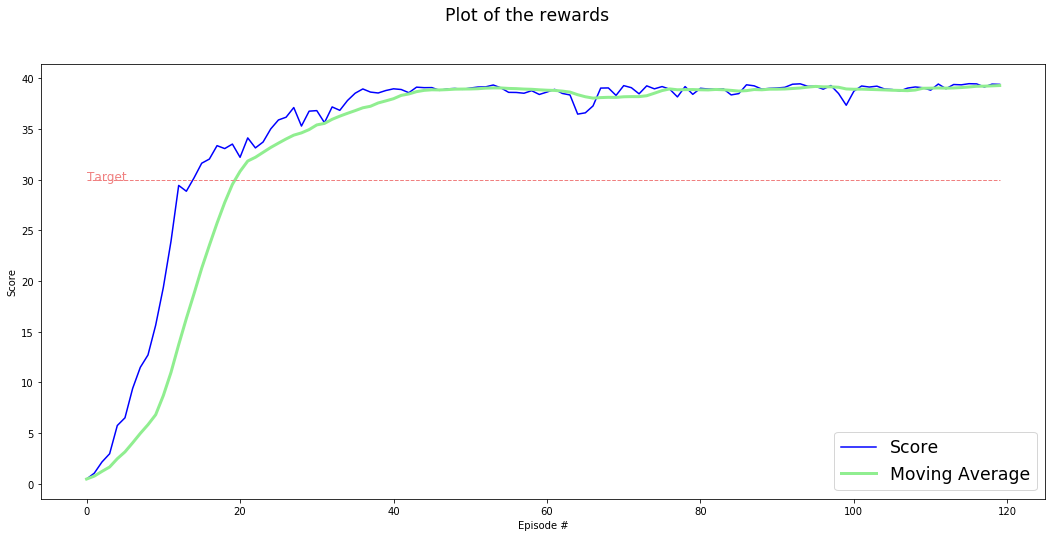

In [7]:
def ddpg(n_episodes=1000, max_t=1000):
    """ Deep Deterministic Policy Gradient
    
        INPUTS: 
        ------------
            n_episodes - (int) maximum number of training episodes
            max_t - (int) maximum number of timesteps per episode
            
        OUTPUTS:
        ------------
            scores - (list) list of score values for each episode
    """ 
    best_score = -np.inf                                       # initialize best score as minus infinite 
    mean_scores = []                                           # list containing scores from each episode
    mean_score_window = deque(maxlen=10)                       # last 10 scores
    mean_scores_window_avg = []                                # list container to store the rolling avg of mean_score_window
    consec_episodes = 0                                        # counter for consecutive episodes with mean_scores_window_avg > 30
    for i_episode in range(1, n_episodes+1):                   # start for loop over episodes
        env_info = env.reset(train_mode=True)[brain_name]      # get/reset enviroment      
        states = env_info.vector_observations                  # get states values for all 20 agents from environment
        agent.reset()                                          # reset the agents' noise
        score = np.zeros(num_agents)                           # initialize episode score for all 20 agents
        start_time = time.time()                               # start episode timer
        for t in range(max_t):                                 # start for loop over episode's time steps
            actions = agent.act(states)                        # return actions for current states and policy
            env_info = env.step(actions)[brain_name]           # send all actions to the environment
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            dones = env_info.local_done                        # see if episode finished
            
            # save experience to replay buffer,
            for state, action, reward, next_state, done in zip(states, actions, rewards, next_states, dones):
                agent.step(state, action, reward, next_state, done, t)  

            states = next_states                                      # save next_sates as actual states
            score += rewards                                          # add up rewards of all 20 agents for this time step to episode score 
            
            if np.any(dones):                                         # exit loop if episode finished
                break
        
        duration = time.time() - start_time                           # calculate elapsed time for actual episode
        mean_scores.append(np.mean(score))                            # save most recent score
        mean_score_window.append(mean_scores[-1])                     # add to consecutive scores
        mean_scores_window_avg.append(np.mean(mean_score_window))     # save the most recent consecutive score

        # if actual mean_score averaged over 20 agents and over 10 consecutive episodes is LOWER than 30 ... 
        # print scores, set consec_epsiodes to 0 if needed
        if mean_scores_window_avg[-1] < 30:
            print('\rEpisode {}\tDur: {:.1f} \tAverage Eps Score: {:.2f} \tMean Consec Score: {:.2f}'.format(i_episode, round(duration), mean_scores[-1], mean_scores_window_avg[-1]))
            if consec_episodes != 0:
                consec_episodes = 0
        
        # if actual mean_score averaged over 20 agents and over 10 consecutive episodes is HIGHER than 30 ... 
        # print scores, increase consec_epsiodes, update pytorch model state_dicts and save them
        # if consec_episodes == 100 --> task is successfully completed.
        if mean_scores_window_avg[-1] >= 30:
            consec_episodes += 1
            print('\rEpisode {}\tDur: {:.1f} \tAverage Eps Score: {:.2f} \tMean Consec Score: {:.2f} \tConsec Eps: {:.2f}'.format(i_episode, round(duration), mean_scores[-1], mean_scores_window_avg[-1], int(consec_episodes)))

            
            if mean_scores_window_avg[-1] > best_score:
                torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
                torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
                best_score = mean_scores_window_avg[-1]
            
            if consec_episodes == 100:
                print('\nEnvironment SOLVED : \tMoving Average ={:.1f} over last {} episodes'.format(mean_scores_window_avg[-1], consec_episodes))            
                break
     
    return mean_scores, mean_scores_window_avg


mean_scores, mean_scores_window_avg = ddpg()


# Plot mean_scores and mean_scores_window_avg (moving average)
target = [30] * len(mean_scores) # Trace a line indicating the target value
fig = plt.figure(figsize=(18,8))
fig.suptitle('Plot of the rewards', fontsize='xx-large')

ax = fig.add_subplot(111)
ax.plot(mean_scores, label='Score', color='Blue')
ax.plot(mean_scores_window_avg, label='Moving Average',
        color='LightGreen', linewidth=3)
ax.plot(target, linestyle='--', color='LightCoral', linewidth=1 )
ax.text(0, 30, 'Target', color='LightCoral', fontsize='large')
ax.set_ylabel('Score')
ax.set_xlabel('Episode #')
ax.legend(fontsize='xx-large', loc='lower right')

plt.show()

When finished, you can close the environment.

In [8]:
env.close()